In [ ]:
# import library
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
txt_file_path = r'c:\data science\10 academy\week3\Technical Content\Data\MachineLearningRating_v3.txt'

# Read the TXT file using '|' as the delimiter
df = pd.read_csv(txt_file_path, delimiter='|')

# Define the output path with a .csv filename
csv_file_path = r'c:\data science\10 academy\week3\Technical Content\Data\MachineLearningRating_v3.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Print confirmation message
print(f"Data successfully converted from .txt to {csv_file_path}")

# Load the newly created CSV file for further analysis
df = pd.read_csv(csv_file_path)

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2188756940.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_file_path, delimiter='|')


Data successfully converted from .txt to c:\data science\10 academy\week3\Technical Content\Data\MachineLearningRating_v3.csv


C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2188756940.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
display(df.head())

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
display(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [5]:
# Function to handle missing values
def handle_missing_values(df):
    # Filling missing values for numerical columns with their mean
    df = df.fillna(df.mean(numeric_only=True))
    
    # Filling missing categorical values with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    return df

# Function to convert data types
def convert_data_types(df):
    # Convert TransactionMonth to datetime format
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    return df

# Function to remove duplicates
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

# Function to handle outliers using IQR
def remove_outliers(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate IQR for numerical columns
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df

def clean_data(df):
    df = handle_missing_values(df)
    df = convert_data_types(df)
    df = remove_duplicates(df)
    df = remove_outliers(df)
    
    return df
df= clean_data(df)

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2951216150.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [6]:
# Main function to clean data

In [7]:
def display_descriptive_statistics(df):
    print("\nDescriptive Statistics:\n")
    display(df[['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']].describe())



In [8]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured']].describe())




Descriptive Statistics:
        TotalPremium  TotalClaims  CustomValueEstimate     SumInsured
count  345173.000000     345173.0         3.451730e+05  345173.000000
mean        5.037581          0.0         2.255311e+05   21657.010219
std         9.231392          0.0         5.820775e-11   77101.298264
min       -30.560272          0.0         2.255311e+05       0.010000
25%         0.000000          0.0         2.255311e+05    3500.000000
50%         1.557719          0.0         2.255311e+05    7000.000000
75%         5.030702          0.0         2.255311e+05    7500.000000
max        54.717444          0.0         2.255311e+05  500000.000000


In [9]:
# Function to check Data Structure (data types)
def display_data_structure(df):
    print("\nData Structure:\n")
    display(df.dtypes)

In [10]:
  # Data Structure
display_data_structure(df)


Data Structure:



UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [11]:
# Function for Univariate Analysis of Numerical Variables
def plot_numerical_distribution(df):
    numerical_cols = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']
    df[numerical_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

# Function for Univariate Analysis of Categorical Variables
def plot_categorical_distribution(df):
    categorical_cols = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
                        'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 
                        'VehicleType', 'CoverType']

    # Set up the grid size for subplots (3 rows, 4 columns)
    n_rows, n_cols = 3, 4
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figure size
    axes = axes.flatten()

    # Plot each categorical variable
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

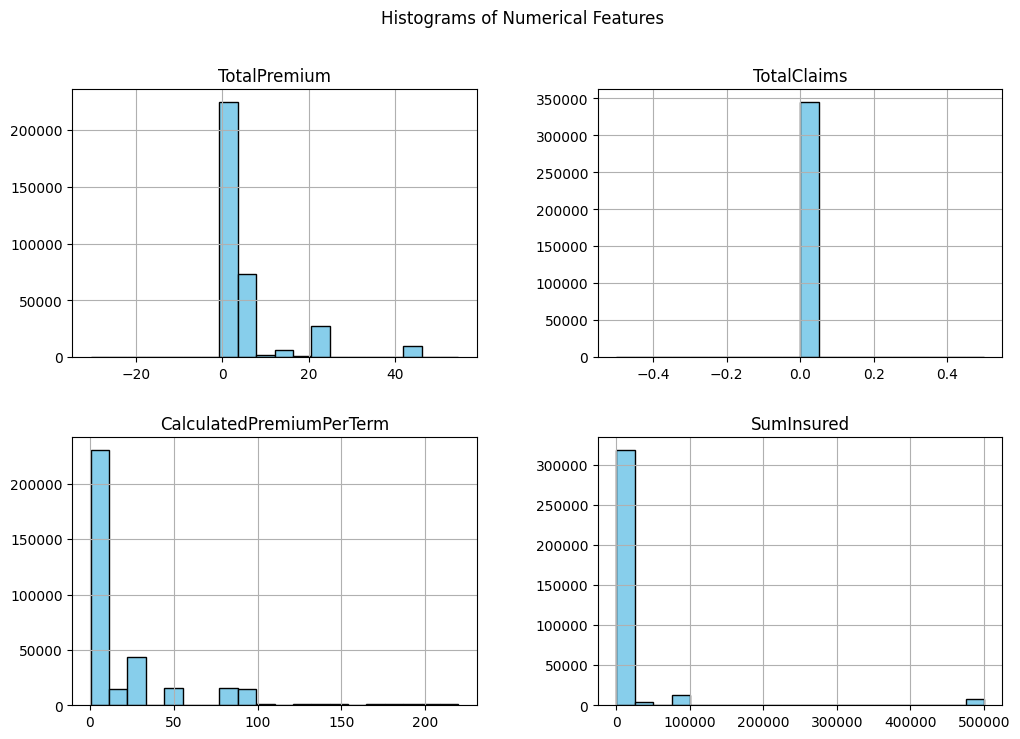

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2833475739.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2833475739.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2833475739.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2833475739.py

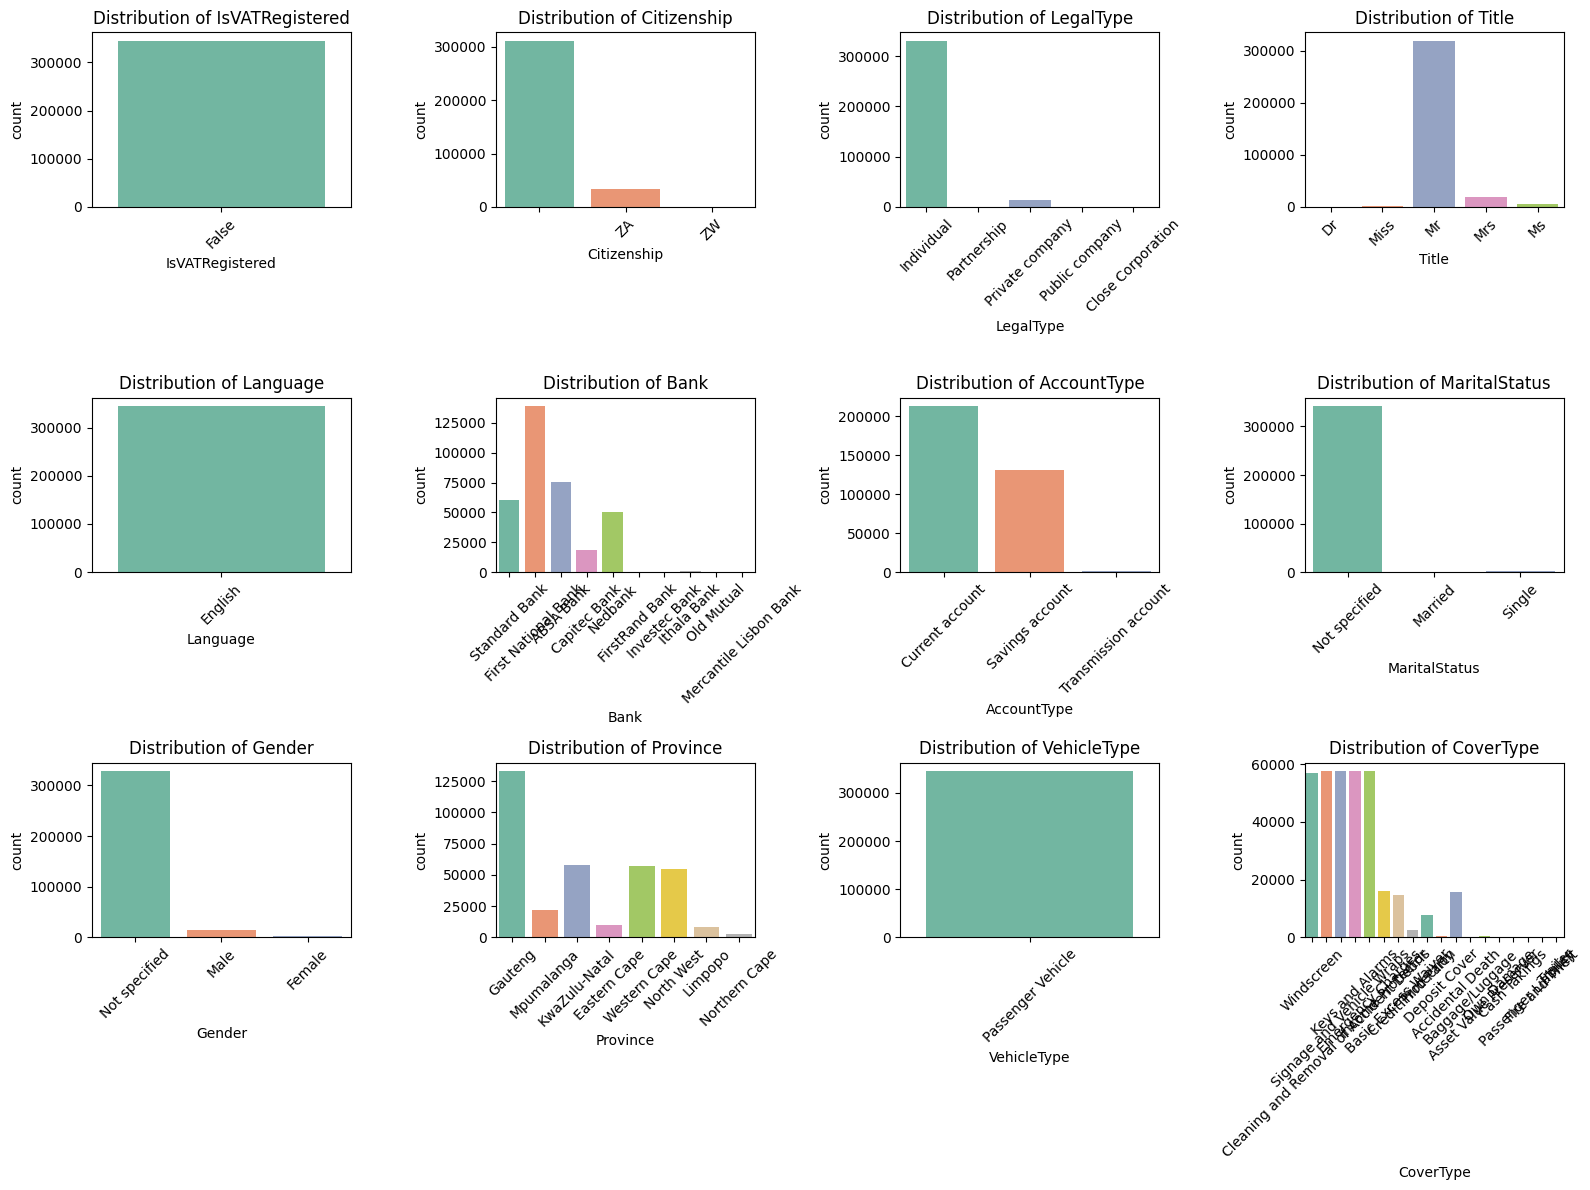

In [12]:
#  Univariate Analysis (Numerical and Categorical)
plot_numerical_distribution(df)
plot_categorical_distribution(df)

In [13]:
# Function for Correlation Matrix and Scatter Plot
def plot_correlation_and_scatter(df):
    # Correlation Matrix
    correlation_matrix = df[['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df, hue='Province', palette='viridis')
    plt.title('Scatter Plot of TotalPremium vs TotalClaims by Province')
    plt.show()

# Function to analyze trends over geography (Province)
def analyze_trends_by_province(df):
    grouped_data = df.groupby('Province')[['CoverType', 'CalculatedPremiumPerTerm']].agg(lambda x: x.value_counts().index[0])
    print("\nTrends Over Geography (Province):\n")
    display(grouped_data)

# Function for Outlier Detection (Box Plots)
def plot_outliers(df):
    numerical_cols = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'SumInsured']
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x=df[col], palette='Set3')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Function for Custom Visualizations
def creative_visualizations(df):
    # Plot 1: Total Premium by VehicleType
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='VehicleType', y='TotalPremium', data=df, palette='husl')
    plt.xticks(rotation=45)
    plt.title('Total Premium Distribution by VehicleType')
    plt.show()

    # Plot 2: Total Claims Distribution by CoverType
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='muted')
    plt.xticks(rotation=45)
    plt.title('Total Claims Distribution by CoverType')
    plt.show()

    # Plot 3: VehicleType vs CalculatedPremiumPerTerm
    plt.figure(figsize=(10, 6))
    sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=df, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('VehicleType vs CalculatedPremiumPerTerm')
    plt.show()

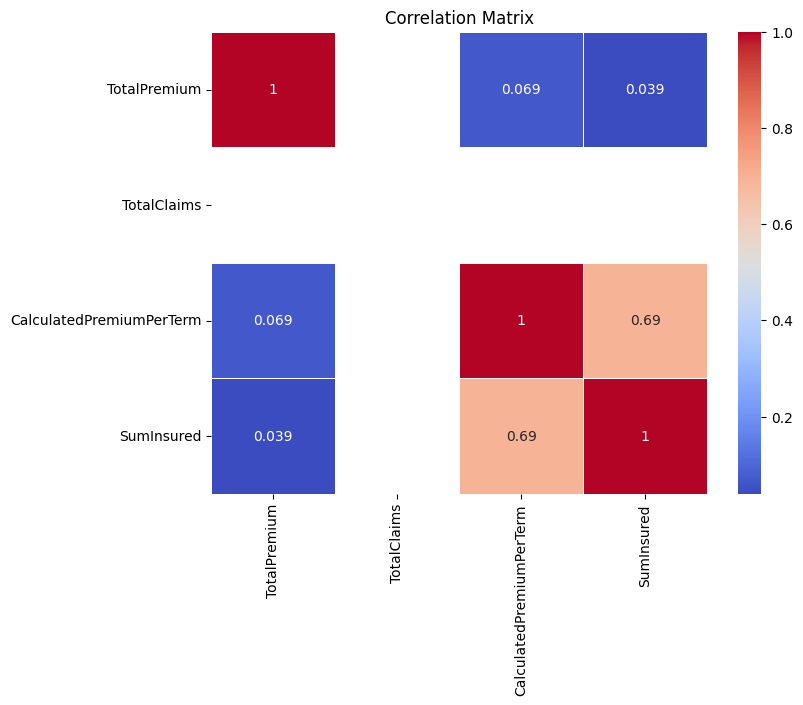

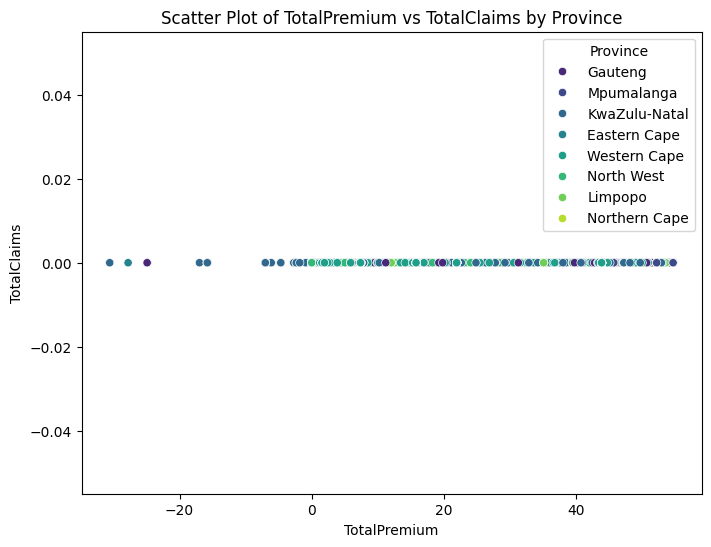

In [14]:
# Bivariate and Multivariate Analysis
plot_correlation_and_scatter(df)

In [15]:
 #  Trends over Geography
analyze_trends_by_province(df)


Trends Over Geography (Province):



,CoverType,CalculatedPremiumPerTerm
Province,,
Eastern Cape,Keys and Alarms,25.0
Gauteng,Cleaning and Removal of Accident Debris,25.0
KwaZulu-Natal,Keys and Alarms,25.0
Limpopo,Emergency Charges,25.0
Mpumalanga,Cleaning and Removal of Accident Debris,25.0
North West,Signage and Vehicle Wraps,25.0
Northern Cape,Signage and Vehicle Wraps,25.0
Western Cape,Cleaning and Removal of Accident Debris,25.0


C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:28: FutureWarning: 

Passing `palette` without assigning

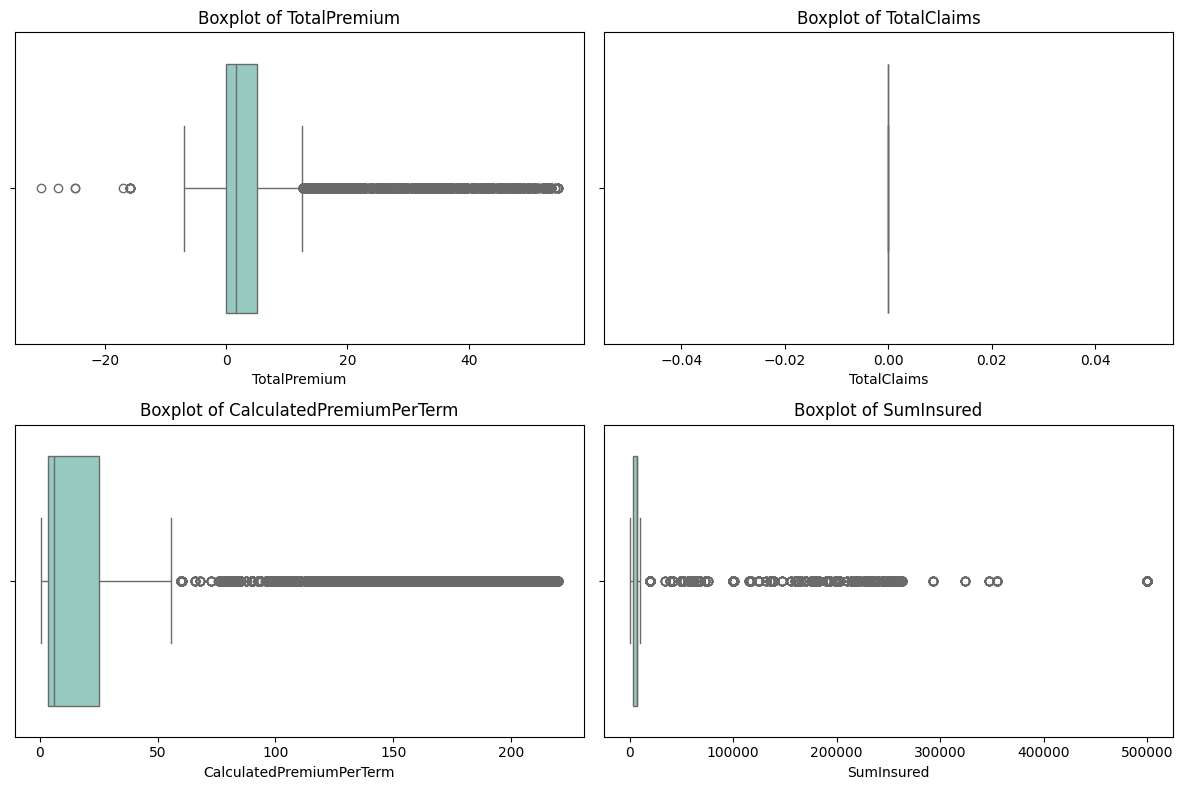

In [16]:
 # Outlier Detection
plot_outliers(df)

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VehicleType', y='TotalPremium', data=df, palette='husl')


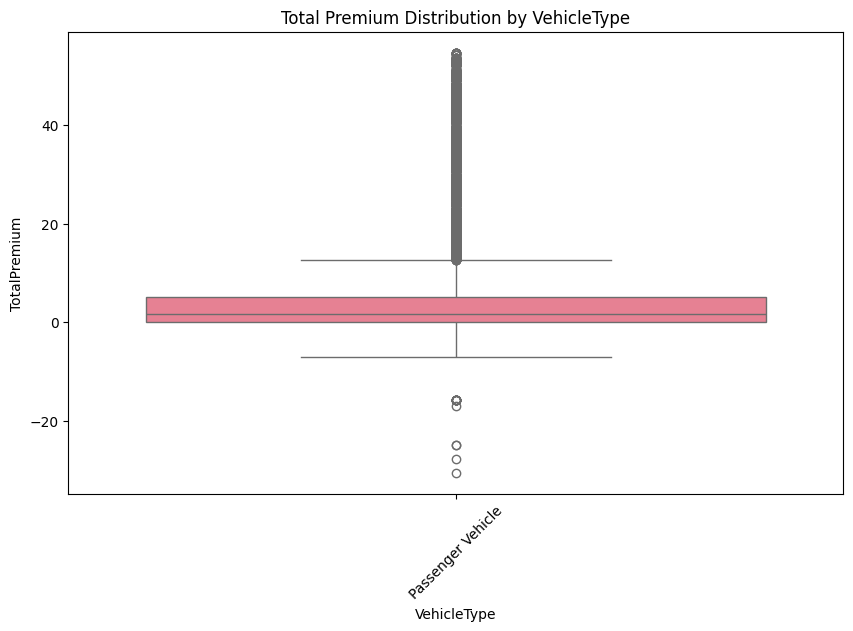

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='muted')


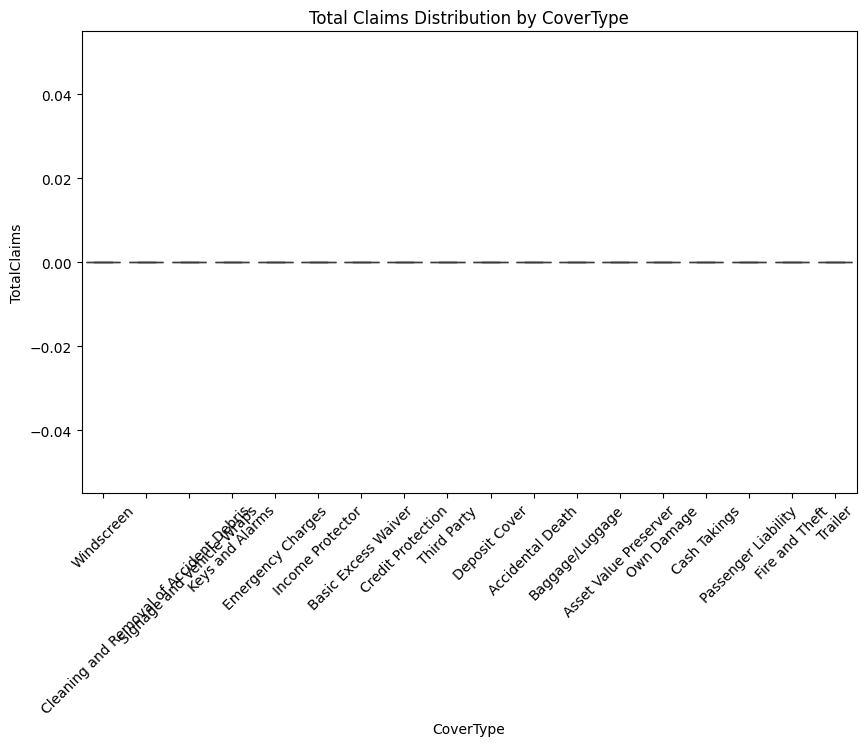

C:\Users\michael\AppData\Local\Temp\ipykernel_7868\2155746803.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=df, palette='coolwarm')


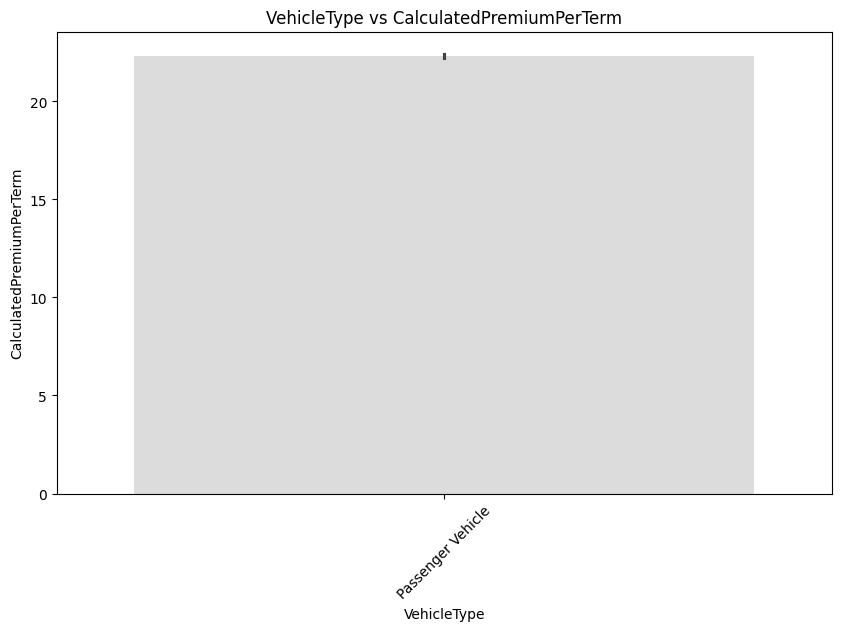

In [17]:
  # Creative Visualizations
creative_visualizations(df)